In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import requests
import tarfile
import torch 
import random
import numpy as np
from PIL import Image
import torchvision
from random import shuffle
import torch.utils.data as data_
import torch.nn as nn
from tqdm.notebook import tqdm
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from google.colab.patches import cv2_imshow

In [ ]:
# Train directory
images_directory = "/content/drive/My Drive/Colab Notebooks/new"

# Check directory
check_path = "/content/drive/My Drive/Colab Notebooks/check2"

# Setting Device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Network definition
class MiniCNN(nn.Module):
  def __init__(self):
    super(MiniCNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.fc1 = nn.Linear(9216, 128)
    self.fc2 = nn.Linear(128, 36)
    self.pool = nn.MaxPool2d(2)

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = self.pool(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    # x = x.softmax(1)
    return x

In [ ]:
TRANSFORM_IMG = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),                          
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
    ])
TRAIN_DATA_PATH = images_directory


In [ ]:
class CategoricalCrossEntropyLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, y_hat, y):
        return F.nll_loss(y_hat.log(), y.argmax(dim=1))

In [ ]:
# Set up model, loss and optimizer
model = MiniCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.01)

In [ ]:
def tensor_target(symbols):
  target = torch.zeros(len(symbols), 36)
  for i, j in enumerate(symbols):
    target[i][j] = 1.0
  return target

In [ ]:
# Converting PIL image to Tensor
def pil_to_torch(im):
  return torch.tensor(np.array(im)/255., dtype=torch.float).permute(2, 0, 1).unsqueeze(0).permute(1,0,2,3)

In [ ]:
BATCH_SIZE = 3
train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=TRANSFORM_IMG)
train_data_loader = data_.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)

test_data = torchvision.datasets.ImageFolder(root=check_path, transform=TRANSFORM_IMG)
test_data_loader = data_.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)

# The training loop
for epoch in range(3):
  print(f'Epoch {epoch}')
  for data, target in tqdm(train_data_loader, unit='batch'):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    # print(output)
    
    target_ = tensor_target(target)
    # print(target_)
    loss = criterion(output, target)
    print(loss)
    loss.backward()
    optimizer.step()

Epoch 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  0%|          | 0/386 [00:00<?, ?batch/s]

tensor(3.1813, grad_fn=<NllLossBackward0>)
tensor(3.0546, grad_fn=<NllLossBackward0>)
tensor(3.3927, grad_fn=<NllLossBackward0>)
tensor(3.2041, grad_fn=<NllLossBackward0>)
tensor(3.4284, grad_fn=<NllLossBackward0>)
tensor(3.3708, grad_fn=<NllLossBackward0>)
tensor(3.2368, grad_fn=<NllLossBackward0>)
tensor(3.2142, grad_fn=<NllLossBackward0>)
tensor(2.5969, grad_fn=<NllLossBackward0>)
tensor(3.3447, grad_fn=<NllLossBackward0>)
tensor(3.3180, grad_fn=<NllLossBackward0>)
tensor(3.1029, grad_fn=<NllLossBackward0>)
tensor(2.9492, grad_fn=<NllLossBackward0>)
tensor(2.5959, grad_fn=<NllLossBackward0>)
tensor(3.1431, grad_fn=<NllLossBackward0>)
tensor(3.2447, grad_fn=<NllLossBackward0>)
tensor(2.9771, grad_fn=<NllLossBackward0>)
tensor(2.8650, grad_fn=<NllLossBackward0>)
tensor(3.1305, grad_fn=<NllLossBackward0>)
tensor(3.0364, grad_fn=<NllLossBackward0>)
tensor(3.7451, grad_fn=<NllLossBackward0>)
tensor(3.3785, grad_fn=<NllLossBackward0>)
tensor(3.4243, grad_fn=<NllLossBackward0>)
tensor(2.93

  0%|          | 0/386 [00:00<?, ?batch/s]

tensor(0.9773, grad_fn=<NllLossBackward0>)
tensor(1.9687, grad_fn=<NllLossBackward0>)
tensor(1.4862, grad_fn=<NllLossBackward0>)
tensor(2.4173, grad_fn=<NllLossBackward0>)
tensor(1.6823, grad_fn=<NllLossBackward0>)
tensor(2.4240, grad_fn=<NllLossBackward0>)
tensor(0.7888, grad_fn=<NllLossBackward0>)
tensor(0.8238, grad_fn=<NllLossBackward0>)
tensor(2.1822, grad_fn=<NllLossBackward0>)
tensor(1.8726, grad_fn=<NllLossBackward0>)
tensor(2.3838, grad_fn=<NllLossBackward0>)
tensor(0.7440, grad_fn=<NllLossBackward0>)
tensor(0.5372, grad_fn=<NllLossBackward0>)
tensor(0.6188, grad_fn=<NllLossBackward0>)
tensor(0.8961, grad_fn=<NllLossBackward0>)
tensor(1.1376, grad_fn=<NllLossBackward0>)
tensor(1.4469, grad_fn=<NllLossBackward0>)
tensor(1.7881, grad_fn=<NllLossBackward0>)
tensor(1.2670, grad_fn=<NllLossBackward0>)
tensor(0.4778, grad_fn=<NllLossBackward0>)
tensor(3.4446, grad_fn=<NllLossBackward0>)
tensor(1.2648, grad_fn=<NllLossBackward0>)
tensor(2.9468, grad_fn=<NllLossBackward0>)
tensor(0.95

  0%|          | 0/386 [00:00<?, ?batch/s]

tensor(0.9039, grad_fn=<NllLossBackward0>)
tensor(2.5486, grad_fn=<NllLossBackward0>)
tensor(0.7382, grad_fn=<NllLossBackward0>)
tensor(1.8384, grad_fn=<NllLossBackward0>)
tensor(0.3351, grad_fn=<NllLossBackward0>)
tensor(0.3723, grad_fn=<NllLossBackward0>)
tensor(0.4964, grad_fn=<NllLossBackward0>)
tensor(0.9077, grad_fn=<NllLossBackward0>)
tensor(1.6785, grad_fn=<NllLossBackward0>)
tensor(0.1959, grad_fn=<NllLossBackward0>)
tensor(1.8919, grad_fn=<NllLossBackward0>)
tensor(1.6286, grad_fn=<NllLossBackward0>)
tensor(2.0128, grad_fn=<NllLossBackward0>)
tensor(0.9210, grad_fn=<NllLossBackward0>)
tensor(0.5219, grad_fn=<NllLossBackward0>)
tensor(1.9394, grad_fn=<NllLossBackward0>)
tensor(0.9884, grad_fn=<NllLossBackward0>)
tensor(1.2748, grad_fn=<NllLossBackward0>)
tensor(0.3380, grad_fn=<NllLossBackward0>)
tensor(1.3641, grad_fn=<NllLossBackward0>)
tensor(0.8987, grad_fn=<NllLossBackward0>)
tensor(0.4167, grad_fn=<NllLossBackward0>)
tensor(0.8478, grad_fn=<NllLossBackward0>)
tensor(0.38

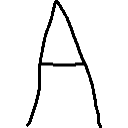

tensor([[ 0.6202,  1.5386,  0.6465,  0.2574,  1.7513,  0.9611,  0.1376,  0.4561,
         -1.4454, -0.3237,  2.2461,  0.2832, -0.5256,  1.0442, -0.8833, -0.1744,
         -1.5707,  0.4875, -0.0744,  0.5979,  0.3670, -1.1482, -1.7949, -0.4673,
         -0.4713,  1.0366,  0.5109, -0.2881, -0.5523, -0.3152,  0.9411,  0.5788,
         -0.4337, -1.9102, -0.9620, -1.2202],
        [ 0.6202,  1.5386,  0.6465,  0.2574,  1.7513,  0.9611,  0.1376,  0.4561,
         -1.4454, -0.3237,  2.2461,  0.2832, -0.5256,  1.0442, -0.8833, -0.1744,
         -1.5707,  0.4875, -0.0744,  0.5979,  0.3670, -1.1482, -1.7949, -0.4673,
         -0.4713,  1.0366,  0.5109, -0.2881, -0.5523, -0.3152,  0.9411,  0.5788,
         -0.4337, -1.9102, -0.9620, -1.2202],
        [ 0.6202,  1.5386,  0.6465,  0.2574,  1.7513,  0.9611,  0.1376,  0.4561,
         -1.4454, -0.3237,  2.2461,  0.2832, -0.5256,  1.0442, -0.8833, -0.1744,
         -1.5707,  0.4875, -0.0744,  0.5979,  0.3670, -1.1482, -1.7949, -0.4673,
         -0.4713,

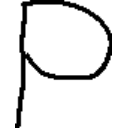

tensor([[ 2.3026, -2.0516, -1.6286, -2.9300,  0.9668, -1.4298, -0.0126,  2.4427,
         -1.3151, -0.4854,  1.0882,  0.4077, -1.4385,  2.7753, -0.2782,  3.1215,
         -0.1510,  2.4080, -2.1213, -0.2033,  0.2322, -2.2618,  1.6386,  0.1487,
          1.2595,  5.2012, -0.1610,  0.7506, -2.1080,  0.3056,  0.6426,  1.9988,
          0.0478, -3.1987, -0.4106,  0.0603],
        [ 2.3026, -2.0516, -1.6286, -2.9300,  0.9668, -1.4298, -0.0126,  2.4427,
         -1.3151, -0.4854,  1.0882,  0.4077, -1.4385,  2.7753, -0.2782,  3.1215,
         -0.1510,  2.4080, -2.1213, -0.2033,  0.2322, -2.2618,  1.6386,  0.1487,
          1.2595,  5.2012, -0.1610,  0.7506, -2.1080,  0.3056,  0.6426,  1.9988,
          0.0478, -3.1987, -0.4106,  0.0603],
        [ 2.3026, -2.0516, -1.6286, -2.9300,  0.9668, -1.4298, -0.0126,  2.4427,
         -1.3151, -0.4854,  1.0882,  0.4077, -1.4385,  2.7753, -0.2782,  3.1215,
         -0.1510,  2.4080, -2.1213, -0.2033,  0.2322, -2.2618,  1.6386,  0.1487,
          1.2595,

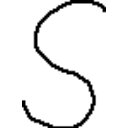

tensor([[ 0.9097,  0.0476,  0.3851,  0.8471, -0.0323,  3.3594,  1.4349, -1.4416,
         -1.0023,  0.1880,  1.0193,  0.1032,  1.1632,  0.8162, -0.3847, -1.6097,
          0.7266, -0.7705,  1.5221,  1.1471, -0.4060, -0.0929, -2.9250,  0.5661,
          0.0561, -1.3752,  1.0652, -1.1313,  1.9412, -0.7150,  1.3115, -1.4991,
         -1.8606, -1.2011, -0.8997, -2.1777],
        [ 0.9097,  0.0476,  0.3851,  0.8471, -0.0323,  3.3594,  1.4349, -1.4416,
         -1.0023,  0.1880,  1.0193,  0.1032,  1.1632,  0.8162, -0.3847, -1.6097,
          0.7266, -0.7705,  1.5221,  1.1471, -0.4060, -0.0929, -2.9250,  0.5661,
          0.0561, -1.3752,  1.0652, -1.1313,  1.9412, -0.7150,  1.3115, -1.4991,
         -1.8606, -1.2011, -0.8997, -2.1777],
        [ 0.9097,  0.0476,  0.3851,  0.8471, -0.0323,  3.3594,  1.4349, -1.4416,
         -1.0023,  0.1880,  1.0193,  0.1032,  1.1632,  0.8162, -0.3847, -1.6097,
          0.7266, -0.7705,  1.5221,  1.1471, -0.4060, -0.0929, -2.9250,  0.5661,
          0.0561,

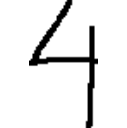

tensor([[ 0.6331,  3.3029, -1.8885,  1.2165,  5.3678,  2.6168,  0.4037, -0.9143,
         -1.9613,  2.4297,  2.6724,  1.3605, -3.1095,  0.7942, -0.9555, -0.7664,
         -1.8859,  1.6142, -1.0546, -1.7195,  0.4660, -2.9792, -0.0530,  1.4745,
         -0.6450,  0.6112,  0.4313, -0.6825,  0.1783, -0.4902,  0.4759, -0.4321,
         -1.6911, -2.2809,  0.1376, -3.3115],
        [ 0.6331,  3.3029, -1.8885,  1.2165,  5.3678,  2.6168,  0.4037, -0.9143,
         -1.9613,  2.4297,  2.6724,  1.3605, -3.1095,  0.7942, -0.9555, -0.7664,
         -1.8859,  1.6142, -1.0546, -1.7195,  0.4660, -2.9792, -0.0530,  1.4745,
         -0.6450,  0.6112,  0.4313, -0.6825,  0.1783, -0.4902,  0.4759, -0.4321,
         -1.6911, -2.2809,  0.1376, -3.3115],
        [ 0.6331,  3.3029, -1.8885,  1.2165,  5.3678,  2.6168,  0.4037, -0.9143,
         -1.9613,  2.4297,  2.6724,  1.3605, -3.1095,  0.7942, -0.9555, -0.7664,
         -1.8859,  1.6142, -1.0546, -1.7195,  0.4660, -2.9792, -0.0530,  1.4745,
         -0.6450,

In [ ]:
lab = sorted(os.listdir(images_directory)) 

with torch.no_grad():
  for path in sorted(os.listdir(check_path)):
    path = check_path + '/' + path
    image = Image.open(path).convert("RGB").resize((28, 28))
    display(Image.open(path).convert("RGB"))
    im = pil_to_torch(image)
    im = im.to(device)
    y = model(im)
    print(y)
    print(y)
    a = [i.item() for i in y[0]]
    print(lab[a.index(max(a))])

In [ ]:
# Testing
correct = 0
total = 8
with torch.no_grad():
  # Iterate through test set minibatchs
  for data, labels in tqdm(test_data_loader):
    data, labs = data.to(device), labels.to(device) # Move the data to GPU for faster execution.
    y = model(data) # Forward pass
    #print(y)
    predictions = torch.argmax(y, dim=1) # The model has ten outputs, one for each digit. Here we take the index with the highest output
    print (predictions, labs)
    correct += torch.sum((predictions == labs).float())

print(f'Test accuracy: {correct/total * 100:.2f}%')

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor([30,  4, 15]) tensor([6, 0, 2])
tensor([20,  5, 14]) tensor([3, 1, 2])
tensor([23, 22]) tensor([5, 4])
Test accuracy: 0.00%
